In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olympic_results = pd.read_csv('olympic_results.csv')
olympic_medals = pd.read_csv('olympic_medals.csv')
population = pd.read_csv('world_population.csv')
WHO = pd.read_csv('who_life_exp.csv')

In [3]:
olympic_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/fatima-galvez,Fatima GALVEZ,Spain,ES,ESP
1,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/alberto-ferna...,Alberto FERNANDEZ,Spain,ES,ESP
2,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/alessandra-pe...,Alessandra PERILLI,San Marino,SM,SMR
3,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/gian-marco-berti,Gian Marco BERTI,San Marino,SM,SMR
4,Shooting,tokyo-2020,Trap Mixed Team,Mixed,BRONZE,GameTeam,United States of America,https://olympics.com/en/athletes/madelynn-ann-...,Madelynn Ann BERNAU,United States of America,US,USA


In [4]:
medals_unw_cols= ['event_title', 'event_gender', 'participant_type','participant_title', 'athlete_url', 'country_code','country_3_letter_code']

In [5]:
Medal_wanted = pd.DataFrame(olympic_medals)

In [6]:
Medals= Medal_wanted.drop(columns = medals_unw_cols)

In [7]:
Medals=Medals.replace(to_replace=['German Democratic Republic (Germany)','Federal Republic of Germany'] , value='Germany')
Medals=Medals.replace(to_replace=['ROC','Olympic Athletes from Russia','Soviet Union','Russian Federation'], value='Russia')
Medals=Medals.replace(to_replace=["People's Republic of China",'Chinese Taipei','Hong Kong, China'], value='China')
Medals=Medals.replace(to_replace=['United States of America','America'], value='United States')

In [8]:
Medals.head()

,discipline_title,slug_game,medal_type,athlete_full_name,country_name
0,Shooting,tokyo-2020,GOLD,Fatima GALVEZ,Spain
1,Shooting,tokyo-2020,GOLD,Alberto FERNANDEZ,Spain
2,Shooting,tokyo-2020,SILVER,Alessandra PERILLI,San Marino
3,Shooting,tokyo-2020,SILVER,Gian Marco BERTI,San Marino
4,Shooting,tokyo-2020,BRONZE,Madelynn Ann BERNAU,United States


In [9]:
Medals['country_name'].head()

0            Spain
1            Spain
2       San Marino
3       San Marino
4    United States
Name: country_name, dtype: object

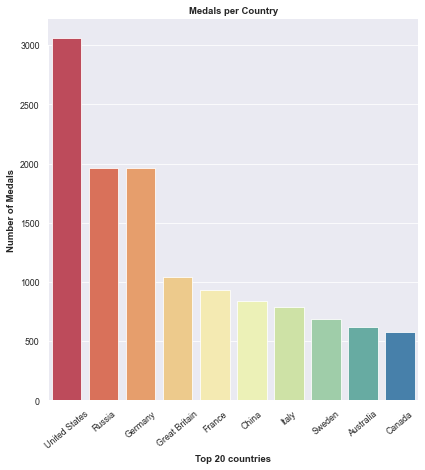

In [88]:
total_Medals =Medals.country_name.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=total_Medals,
                height=6, kind="bar", palette='Spectral')

g.despine(trim=True)
g.set_xlabels("Top 20 countries", fontweight='bold')
g.set_xticklabels(rotation=40)
g.set_ylabels("Number of Medals",fontweight='bold')
sns.set_theme('paper')
sns.set_style('darkgrid')
plt.title('Medals per Country', fontweight='bold')
plt.savefig('fig1done.png')
plt.show()


In [11]:
Gold_Medals = Medals[Medals['medal_type']=='GOLD']
Silver_Medals = Medals[Medals['medal_type']=='SILVER']
Bronze_Medals = Medals[Medals['medal_type']=='BRONZE']

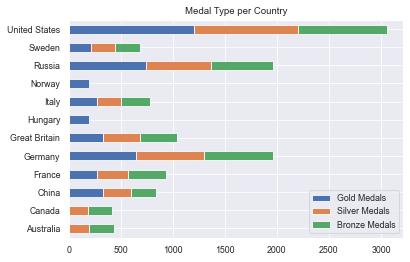

In [85]:
total_Gold_Medals = Gold_Medals.country_name.value_counts().head(10)
total_Silver_Medals = Silver_Medals.country_name.value_counts().head(10)
total_Bronze_Medals = Bronze_Medals.country_name.value_counts().head(10)
df = pd.DataFrame({'Gold Medals':total_Gold_Medals,
                   'Silver Medals':total_Silver_Medals,
                    'Bronze Medals':total_Bronze_Medals})

sns.set_theme('paper')
sns.set_style('darkgrid')
df.plot.barh(stacked= True,title ='Medal Type per Country')
plt.savefig('fig2done.png')
plt.show()


In [13]:
top_ten = total_Medals.head(11)
top_ten.rename(columns = {'index':'Country/Other'}, inplace = True)
print(top_ten)

   Country/Other  Medal
0  United States   3063
1         Russia   1966
2        Germany   1959
3  Great Britain   1041
4         France    932
5          China    838
6          Italy    785
7         Sweden    689
8      Australia    623
9         Canada    574


In [14]:
population_unw_cols = ['Net Change','Density (P/Km²)','Land Area (Km²)','Migrants (net)','Fert. Rate','Med. Age','Urban Pop %']
Population= population.drop(columns = population_unw_cols)
Population.head()

,Country/Other,Population (2020),Yearly Change,World Share
0,Afghanistan,38928346,2.33,0.50
1,Albania,2877797,-0.11,0.04
2,Algeria,43851044,1.85,0.56
3,Angola,32866272,3.27,0.42
4,Antigua and Barbuda,97929,0.84,0.00


In [15]:
Population.loc[190]
Population= Population.replace(to_replace='Great Britian', value='Great Britain')
Population.loc[190], top_ten.loc[3]

(Country/Other        United Kingdom
 Population (2020)          67886011
 Yearly Change                  0.53
 World Share                    0.87
 Name: 190, dtype: object,
 Country/Other    Great Britain
 Medal                     1041
 Name: 3, dtype: object)

In [16]:
population_medals = pd.merge(Population, top_ten)
print(population_medals)

   Country/Other  Population (2020)  Yearly Change  World Share  Medal
0      Australia           25499884           1.18         0.33    623
1         Canada           37742154           0.89         0.48    574
2          China         1439323776           0.39        18.47    838
3         France           65273511           0.22         0.84    932
4        Germany           83783942           0.32         1.07   1959
5          Italy           60461826          -0.15         0.78    785
6         Russia          145934462           0.04         1.87   1966
7         Sweden           10099265           0.63         0.13    689
8  United States          331002651           0.59         4.25   3063


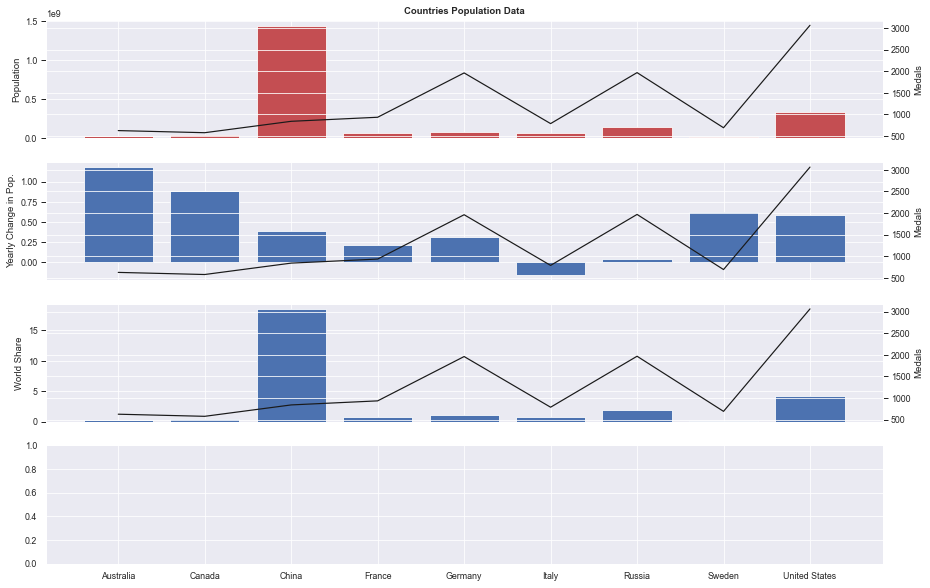

In [105]:
fig, ax = plt.subplots(4,1, sharex = True, figsize=(15,10),facecolor='w', edgecolor='k')
ax[0].bar(population_medals['Country/Other'],population_medals['Population (2020)'], color ='r')
ax[0].set_ylabel('Population')
ax[0].set_title('Countries Population Data', weight='bold')
ax[3]=ax[0].twinx()
ax[3].plot(population_medals['Country/Other'],population_medals['Medal'],color='k')
ax[3].set_ylabel('Medals')

ax[1].bar(population_medals['Country/Other'],population_medals['Yearly Change'], color='b')
ax[1].set_ylabel('Yearly Change in Pop.')
ax[3]=ax[1].twinx()
ax[3].plot(population_medals['Country/Other'],population_medals['Medal'],color='k')
ax[3].set_ylabel('Medals')

ax[2].bar(population_medals['Country/Other'],population_medals['World Share'], color='b')
ax[2].set_ylabel('World Share')
ax[3]=ax[2].twinx()
ax[3].plot(population_medals['Country/Other'],population_medals['Medal'],color='k')
ax[3].set_ylabel('Medals')
sns.set_theme('paper')
sns.set_style('darkgrid')
plt.savefig('fig3done.png')

In [107]:
top_ten.rename(columns = {'Country/Other':'Country'}, inplace = True)
top_ten.head(11)

,Country,Medal
0,United States,3063
1,Russia,1966
2,Germany,1959
3,Great Britain,1041
4,France,932
5,China,838
6,Italy,785
7,Sweden,689
8,Australia,623
9,Canada,574


In [108]:
for col in WHO.columns:
    print(col)

country
country_code
region
year
life_expect
life_exp60
adult_mortality
infant_mort
age1-4mort
alcohol
bmi
age5-19thinness
age5-19obesity
hepatitis
measles
polio
diphtheria
basic_water
doctors
hospitals
gni_capita
gghe-d
che_gdp
une_pop
une_infant
une_life
une_hiv
une_gni
une_poverty
une_edu_spend
une_literacy
une_school


In [109]:
WHO_wnt = WHO[['country','region','year','life_expect','alcohol','bmi']]
WHO_wnt.rename(columns= {'country':'Country'},inplace=True)
WHO['country'].unique()
WHO_wnt = WHO_wnt.replace(to_replace='United Kingdom of Great Britain and Northern Ireland', value='Great Britain')
WHO_wnt = WHO_wnt.replace(to_replace= 'Russian Federation', value='Russia')
WHO_wnt = WHO_wnt.replace(to_replace= 'United States of America', value='United States')
WHO_ten=pd.merge(WHO_wnt, top_ten)
WHO_ten

C:\Users\Danie\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,region,year,life_expect,alcohol,bmi,Medal
0,United States,Americas,2000,76.91159,8.21345,27.5,3063
1,United States,Americas,2001,77.00639,8.25130,27.7,3063
2,United States,Americas,2002,77.13555,8.32700,27.8,3063
3,United States,Americas,2003,77.29466,8.40270,27.9,3063
4,United States,Americas,2004,77.65867,8.47840,28.0,3063
...,...,...,...,...,...,...,...
165,China,Western Pacific,2012,75.60725,5.69396,23.4,838
166,China,Western Pacific,2013,75.78554,5.76347,23.5,838
167,China,Western Pacific,2014,75.98273,5.75935,23.6,838
168,China,Western Pacific,2015,76.18391,5.66114,23.7,838


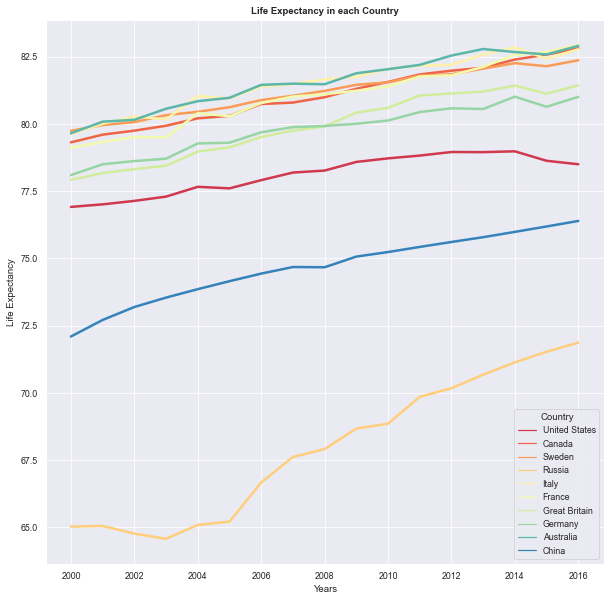

In [131]:
WHO_ten
g = sns.lineplot(x="year", y="life_expect", data=WHO_ten, hue='Country', palette='Spectral',linewidth=2.5)
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_theme('paper')
sns.set_style('darkgrid')
plt.title('Life Expectancy in each Country', fontweight='bold')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.savefig('fig4done.png')

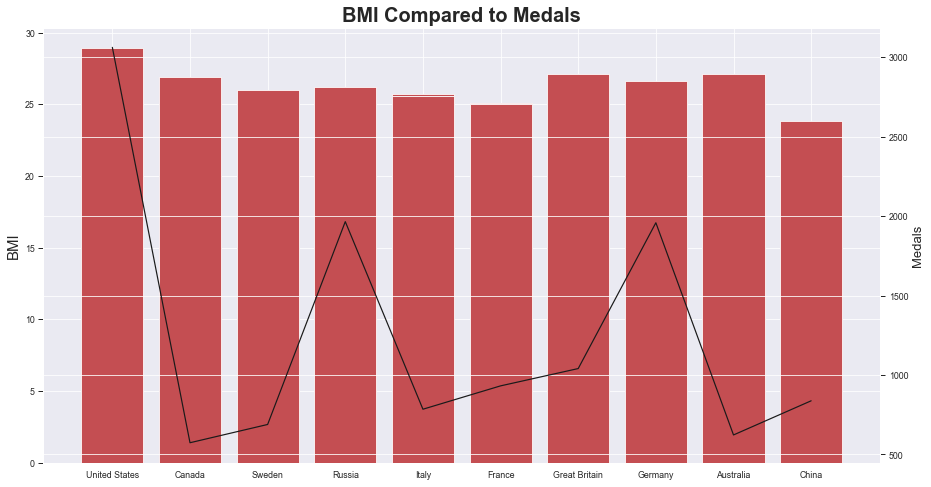

In [146]:
WHO_ten.head()
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(WHO_ten["Country"],WHO_ten["bmi"], color ='r')
ax.set_ylabel('BMI', fontsize=15)
ax1=ax.twinx()
ax1.plot(WHO_ten["Country"],WHO_ten['Medal'],color='k')
ax1.set_ylabel('Medals', fontsize=13)
sns.set_theme('paper')
sns.set_style('darkgrid')
ax.set_title('BMI Compared to Medals', fontsize=20, weight='bold')
plt.savefig('fig5done.png')
plt.show()